In [1]:
# Data libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('fivethirtyeight')
five_thirty_eight = ["#30a2da","#fc4f30","#e5ae38","#6d904f","#8b8b8b",]
sns.set_palette(five_thirty_eight)
%matplotlib inline

# Silence deprecation warnings
import warnings
warnings.filterwarnings("ignore")

# Modeling, validation, and other SKLearn modules
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import f1_score, roc_curve, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
file_path = r'C:\Users\reide\Jupyter Notebooks\Project\Geographical Original of Music\default_plus_chromatic_features_1059_tracks.txt'
print(file_path)
file_path.replace('\\', '/')

C:\Users\reide\Jupyter Notebooks\Project\Geographical Original of Music\default_plus_chromatic_features_1059_tracks.txt


'C:/Users/reide/Jupyter Notebooks/Project/Geographical Original of Music/default_plus_chromatic_features_1059_tracks.txt'

In [3]:
music_df = pd.read_csv('C:/Users/reide/Jupyter Notebooks/Project/Geographical Original of Music/default_plus_chromatic_features_1059_tracks.txt', header=None)

In [4]:
music_df.head()

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,34.03,-6.85


In [5]:
music_df.shape

(1059, 118)

In [6]:
music_df[116].describe()

count    1059.000000
mean       26.651294
std        18.459432
min       -35.300000
25%        14.660000
50%        33.660000
75%        39.910000
max        54.680000
Name: 116, dtype: float64

In [7]:
music_df[117].describe()

count    1059.000000
mean       38.405656
std        50.419790
min       -88.760000
25%         3.210000
50%        32.830000
75%        74.600000
max       149.120000
Name: 117, dtype: float64

In [8]:
just_coord = music_df[[116,117]].copy()
just_coord.columns = ['lat', 'long']
just_coord.head()

,lat,long
0,-15.75,-47.95
1,14.91,-23.51
2,12.65,-8.00
3,9.03,38.74
4,34.03,-6.85


Here, we create the labels for the data by dividing the globe into 16 equal parts, and assign a label/class based on which range the lat/long pair fits.

In [9]:
just_coord.loc[(just_coord.lat <= 90) & (just_coord.lat >= 45) & (just_coord.long >= -180) & (just_coord.long <= -90), 'label'] = 1
just_coord.loc[(just_coord.lat <= 90) & (just_coord.lat >= 45) & (just_coord.long >= -90) & (just_coord.long <= 0), 'label'] = 2
just_coord.loc[(just_coord.lat <= 90) & (just_coord.lat >= 45) & (just_coord.long >= 0) & (just_coord.long <= 90), 'label'] = 3
just_coord.loc[(just_coord.lat <= 90) & (just_coord.lat >= 45) & (just_coord.long >= 90) & (just_coord.long <= 180), 'label'] = 4
just_coord.loc[(just_coord.lat <= 45) & (just_coord.lat >= 0) & (just_coord.long >= -180) & (just_coord.long <= -90), 'label'] = 5
just_coord.loc[(just_coord.lat <= 45) & (just_coord.lat >= 0) & (just_coord.long >= -90) & (just_coord.long <= 0), 'label'] = 6
just_coord.loc[(just_coord.lat <= 45) & (just_coord.lat >= 0) & (just_coord.long >= 0) & (just_coord.long <= 90), 'label'] = 7
just_coord.loc[(just_coord.lat <= 45) & (just_coord.lat >= 0) & (just_coord.long >= 90) & (just_coord.long <= 180), 'label'] = 8
just_coord.loc[(just_coord.lat <= 0) & (just_coord.lat >= -45) & (just_coord.long >= -180) & (just_coord.long <= -90), 'label'] = 9
just_coord.loc[(just_coord.lat <= 0) & (just_coord.lat >= -45) & (just_coord.long >= -90) & (just_coord.long <= 0), 'label'] = 10
just_coord.loc[(just_coord.lat <= 0) & (just_coord.lat >= -45) & (just_coord.long >= 0) & (just_coord.long <= 90), 'label'] = 11
just_coord.loc[(just_coord.lat <= 0) & (just_coord.lat >= -45) & (just_coord.long >= 90) & (just_coord.long <= 180), 'label'] = 12
just_coord.loc[(just_coord.lat <= -45) & (just_coord.lat >= -90) & (just_coord.long >= -180) & (just_coord.long <= -90), 'label'] = 13
just_coord.loc[(just_coord.lat <= -45) & (just_coord.lat >= -90) & (just_coord.long >= -90) & (just_coord.long <= 0), 'label'] = 14
just_coord.loc[(just_coord.lat <= -45) & (just_coord.lat >= -90) & (just_coord.long >= 0) & (just_coord.long <= 90), 'label'] = 15
just_coord.loc[(just_coord.lat <= -45) & (just_coord.lat >= -90) & (just_coord.long >= 90) & (just_coord.long <= 180), 'label'] = 16

In [10]:
just_coord.head(20)

,lat,long,label
0,-15.75,-47.95,10.0
1,14.91,-23.51,6.0
2,12.65,-8.00,6.0
3,9.03,38.74,7.0
4,34.03,-6.85,6.0
5,12.65,-8.00,6.0
6,12.65,-8.00,6.0
7,14.66,-17.41,6.0
8,52.50,-0.12,2.0
9,41.26,69.21,7.0


Let's look at how balanced our classes are.

In [11]:
just_coord.label.value_counts()

7.0     527
6.0     190
8.0     150
11.0     52
12.0     39
10.0     36
2.0      33
3.0      32
Name: label, dtype: int64

Text(0,0.5,'Count')

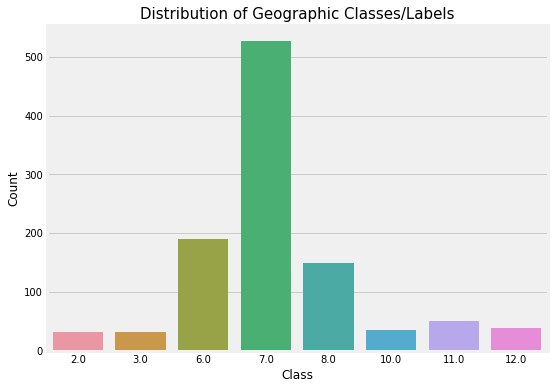

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(just_coord.label)
plt.title('Distribution of Geographic Classes/Labels', fontsize=15)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

Well, we can already tell that we are going to have an issue with unbalanced classes. In addition, half of the map classes that we created don't have any datapoints in them, so our model will likely only work on music coming from locations that are represented in our data.

Here is the section that is over-represented in the data.

<img src="Section 7.png">

This region includes nearly all of Northern Africa, the Middle East, India, and many other places with a rich musical heritage. So, it would make sense that a lot of our data comes from this region.

In [13]:
# Double check that there is no missing data
music_df.columns[music_df.isnull().any()]

Int64Index([], dtype='int64')

Sweet! As reported in the [data description where we got the data](http://archive.ics.uci.edu/ml/datasets/geographical+original+of+music), there is no missing data! So, we can proceed with scaling the data, and then getting into the modeling!

In [14]:
# Create new df without lats and longs
X_df = music_df.copy().drop([116,117], axis=1)

# Train-Test-Split for later testing
X_train, X_test, y_train, y_test = train_test_split(X_df, just_coord.label, test_size=.2, random_state=42)

# Scale the data (fit the Standard Scaler on the training set, then fit both the training and test sets to it)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [15]:
# TTSplit for validation
x_tr, x_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = .2, random_state=42)

In [16]:
x_tr.head()

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
338,-0.738151,-0.466010,-0.799208,-0.523743,-3.285186,1.852218,1.853192,-0.341898,0.656776,0.282785,...,-0.756365,-0.756365,-0.756365,-0.756365,-0.756365,-0.756365,-0.756365,-0.756365,-0.756365,-0.756365
828,-0.303556,-0.608302,0.417542,0.552270,0.741851,-0.637480,-0.614212,-0.595187,-0.479784,1.168692,...,1.814921,1.814921,1.814921,1.814921,1.814921,1.814921,1.814921,1.814921,1.814921,1.814921
2,-0.193634,-0.090246,-0.687070,1.165341,0.250938,1.924881,-2.087244,-0.687825,-1.508443,-0.716167,...,-0.487445,-0.487445,-0.487445,-0.487445,-0.487445,-0.487445,-0.487445,-0.487445,-0.487445,-0.487445
296,-0.340446,-0.752372,-0.793308,-0.449808,0.107686,0.254948,1.526699,-0.540545,-1.066032,0.900452,...,-0.127507,-0.127507,-0.127507,-0.127507,-0.127507,-0.127507,-0.127507,-0.127507,-0.127507,-0.127507
660,0.597994,0.977786,0.004083,0.002835,0.507437,-1.575479,0.557926,2.839942,-0.578979,-0.100907,...,-0.313682,-0.313682,-0.313682,-0.313682,-0.313682,-0.313682,-0.313682,-0.313682,-0.313682,-0.313682


Next, let's run some classifiers, just to see how they compare right out of the gate. Note that we will first test them on all the training data we have before moving on to tuning the model.

In [18]:
def test_clf(clf):
    score = cross_val_score(clf, X_train, y_train, scoring = 'f1_macro', cv = 10)
    print(clf.__class__.__name__,"Score =", score.mean())

In [19]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

models = [lr, knn, svc, dt, rf]
for clf in models:
    test_clf(clf)

LogisticRegression Score = 0.4652046110669992
KNeighborsClassifier Score = 0.4681695069563535
SVC Score = 0.3777264390700916
DecisionTreeClassifier Score = 0.35812100409124514
RandomForestClassifier Score = 0.3932438669448075


Wow, KNN did surprisingly well, as did Logistic Regression. I'm going to move forward with tuning on KNN and Random Forest, which scored third best, but I think has the best potential for improvement moving forward. Let's mess around with KNN first.

In [20]:
param_dictionary = {"n_neighbors": [3, 5, 10], 'leaf_size':[10,20,30,50]}
clf = KNeighborsClassifier(n_jobs=-1)
gs = GridSearchCV(clf, param_dictionary, scoring='f1_macro', n_jobs=-1, verbose=2, cv=10)
gs.fit(x_tr, y_tr)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.4s finished
C:\Users\reide\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [3, 5, 10], 'leaf_size': [10, 20, 30, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=2)

In [21]:
gs.best_params_

{'leaf_size': 10, 'n_neighbors': 3}

In [22]:
train_predictions = gs.predict(x_tr)
cr = classification_report(y_tr, train_predictions)
f1_trained_score = f1_score(y_tr, train_predictions, average = 'macro')
print("Training Scores:")
print(cr)
print("-"*50)
print(f"F1 Score: {f1_trained_score}")

Training Scores:
              precision    recall  f1-score   support

         2.0       0.81      0.71      0.76        24
         3.0       0.95      1.00      0.97        19
         6.0       0.65      0.82      0.72       127
         7.0       0.78      0.89      0.83       322
         8.0       0.88      0.59      0.70        99
        10.0       0.86      0.23      0.36        26
        11.0       0.83      0.58      0.68        33
        12.0       0.82      0.33      0.47        27

   micro avg       0.77      0.77      0.77       677
   macro avg       0.82      0.64      0.69       677
weighted avg       0.78      0.77      0.76       677

--------------------------------------------------
F1 Score: 0.6883937551630348


In [23]:
val_predictions = gs.predict(x_val)
cr = classification_report(y_val, val_predictions)
f1_trained_score = f1_score(y_val, val_predictions, average = 'macro')
print("Validation Scores:")
print(cr)
print("-"*50)
print(f"F1 Score: {f1_trained_score}")

Validation Scores:
              precision    recall  f1-score   support

         2.0       0.29      0.67      0.40         3
         3.0       0.60      0.50      0.55         6
         6.0       0.50      0.69      0.58        32
         7.0       0.69      0.79      0.74        81
         8.0       0.81      0.45      0.58        29
        10.0       0.00      0.00      0.00         4
        11.0       0.40      0.18      0.25        11
        12.0       0.00      0.00      0.00         4

   micro avg       0.62      0.62      0.62       170
   macro avg       0.41      0.41      0.39       170
weighted avg       0.61      0.62      0.60       170

--------------------------------------------------
F1 Score: 0.38597648444517774


So, we tried out some different values for the hyperparameters for KNN, and used the "best" ones to fit a model. The F1 in the training data is a "meh" 0.688, but once we predict on the validation set, we can see that there is quite a bit of overfitting going on, with the F1 dropping down to 0.38, which is worse than it performed on the original set.

We have a few options here. We could continue tweaking with the hyperparameters to perhaps get a lower F1 in training, but reduce the overfitting issue. Or, we could switch to another model that is less prone to overfitting, like the Random Forest. Because Random Forest tends to do rather well, has a lot of upside potential, and also is not so easy to overfit, we're going to take the latter option, switch to Random Forest, and then continue to tweak from there. (Note that it helps that the researchers who originally created this dataset ended up using Random Forest, and it performed the best for them, so...if it ain't broke...)

Another benefit of the Random Forest Classifier is that one of sklearn's options for the built-in implementation is a "class weight" category. This is useful because, as we showed above, we are definitely dealing with a case of unbalanced classes. Once we get to tweaking the model, hopefully we'll be able to not only improve on the overfitting we saw before, but get up to a higher F1 than we have seen previously.

In [24]:
param_dictionary = {"n_estimators": [100, 500, 1000], "max_depth": [1,2,3,5,10]}
clf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)
gs = GridSearchCV(clf, param_dictionary, scoring='f1_macro', n_jobs=-1, verbose=2, cv=10)
gs.fit(x_tr, y_tr)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   48.9s finished
C:\Users\reide\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000], 'max_depth': [1, 2, 3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=2)

In [25]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 500}

In [26]:
train_predictions = gs.predict(x_tr)
cr = classification_report(y_tr, train_predictions)
f1_trained_score = f1_score(y_tr, train_predictions, average = 'macro')
print("Training Scores:")
print(cr)
print("-"*50)
print(f"F1 Score: {f1_trained_score}")

Training Scores:
              precision    recall  f1-score   support

         2.0       1.00      0.92      0.96        24
         3.0       0.95      0.95      0.95        19
         6.0       0.73      0.50      0.59       127
         7.0       0.87      0.58      0.70       322
         8.0       0.58      0.86      0.69        99
        10.0       0.52      0.88      0.66        26
        11.0       0.45      0.97      0.62        33
        12.0       0.34      0.93      0.50        27

   micro avg       0.67      0.67      0.67       677
   macro avg       0.68      0.82      0.71       677
weighted avg       0.76      0.67      0.68       677

--------------------------------------------------
F1 Score: 0.7071350255244228


Nice! We're already to a higher F1 than we have seen previously. However, let's check to see how bad we might be overfitting.

In [27]:
val_predictions = gs.predict(x_val)
cr = classification_report(y_val, val_predictions)
f1_trained_score = f1_score(y_val, val_predictions, average = 'macro')
print("Validation Scores:")
print(cr)
print("-"*50)
print(f"F1 Score: {f1_trained_score}")

Validation Scores:
              precision    recall  f1-score   support

         2.0       1.00      0.67      0.80         3
         3.0       0.43      0.50      0.46         6
         6.0       0.44      0.38      0.41        32
         7.0       0.71      0.46      0.56        81
         8.0       0.47      0.69      0.56        29
        10.0       0.10      0.25      0.14         4
        11.0       0.06      0.09      0.07        11
        12.0       0.15      0.50      0.24         4

   micro avg       0.46      0.46      0.46       170
   macro avg       0.42      0.44      0.40       170
weighted avg       0.54      0.46      0.48       170

--------------------------------------------------
F1 Score: 0.4040612487666064


Yikes. As expected, we are definitely in the realm of overfitting. One thing we can do is manually lower the max_depth hyperparameter, which will bring down our F1, but should help with the overfitting.

In [28]:
param_dictionary = {"max_depth": [3]}
clf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42, n_estimators=500)
gs = GridSearchCV(clf, param_dictionary, scoring='f1_macro', n_jobs=-1, verbose=2, cv=10)
gs.fit(x_tr, y_tr)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3]}, pre_dispatch='2*n_jobs', refit=True,
       return_train_score='warn', scoring='f1_macro', verbose=2)

In [29]:
train_predictions = gs.predict(x_tr)
cr = classification_report(y_tr, train_predictions)
f1_trained_score = f1_score(y_tr, train_predictions, average = 'macro')
print("Training Scores:")
print(cr)
print("-"*50)
print(f"F1 Score: {f1_trained_score}")

Training Scores:
              precision    recall  f1-score   support

         2.0       0.76      0.67      0.71        24
         3.0       0.55      0.89      0.68        19
         6.0       0.55      0.23      0.32       127
         7.0       0.82      0.22      0.35       322
         8.0       0.47      0.66      0.55        99
        10.0       0.22      0.77      0.35        26
        11.0       0.22      0.91      0.36        33
        12.0       0.17      0.78      0.28        27

   micro avg       0.40      0.40      0.40       677
   macro avg       0.47      0.64      0.45       677
weighted avg       0.63      0.40      0.39       677

--------------------------------------------------
F1 Score: 0.44931046181034356


In [30]:
val_predictions = gs.predict(x_val)
cr = classification_report(y_val, val_predictions)
f1_trained_score = f1_score(y_val, val_predictions, average = 'macro')
print("Validation Scores:")
print(cr)
print("-"*50)
print(f"F1 Score: {f1_trained_score}")

Validation Scores:
              precision    recall  f1-score   support

         2.0       1.00      0.67      0.80         3
         3.0       0.33      0.50      0.40         6
         6.0       0.47      0.22      0.30        32
         7.0       0.81      0.31      0.45        81
         8.0       0.42      0.55      0.48        29
        10.0       0.11      0.50      0.17         4
        11.0       0.10      0.27      0.14        11
        12.0       0.08      0.50      0.14         4

   micro avg       0.35      0.35      0.35       170
   macro avg       0.41      0.44      0.36       170
weighted avg       0.58      0.35      0.40       170

--------------------------------------------------
F1 Score: 0.3595767591213467


Well, on the plus side, the overfitting problem is a lot lower than it was before, but our F1 still took a massive hit. In addition, even though the variance between the sets is lower than it was, the validation F1 in the model that was overfitting still outperformed the validation F1 in this one.

So, what are our options? One of the "go-to" options for overfitting is to reduce the number of features in the model. A great way of doing this without losing a lot of the variation across the features is to use Principle Component Analysis (PCA).

For now, we are going to stick with the model that has a greater level of overfitting, but performs better on the validation set.

In [32]:
param_dictionary = {"max_depth": [5], 'n_estimators': [500]}
clf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)
gs = GridSearchCV(clf, param_dictionary, scoring='f1_macro', n_jobs=-1, verbose=2, cv=10)
gs.fit(x_tr, y_tr)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    5.9s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.2s finished
C:\Users\reide\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [5], 'n_estimators': [500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=2)

In [33]:
train_predictions = gs.predict(X_train)
cr = classification_report(y_train, train_predictions)
f1_trained_score = f1_score(y_train, train_predictions, average = 'macro')
print("Training Scores:")
print(cr)
print("-"*50)
print(f"F1 Score: {f1_trained_score}")

Training Scores:
              precision    recall  f1-score   support

         2.0       1.00      0.89      0.94        27
         3.0       0.81      0.84      0.82        25
         6.0       0.66      0.47      0.55       159
         7.0       0.84      0.56      0.67       403
         8.0       0.56      0.82      0.66       128
        10.0       0.44      0.80      0.57        30
        11.0       0.38      0.75      0.50        44
        12.0       0.31      0.87      0.46        31

   micro avg       0.63      0.63      0.63       847
   macro avg       0.63      0.75      0.65       847
weighted avg       0.71      0.63      0.64       847

--------------------------------------------------
F1 Score: 0.6478939141777655


In [34]:
val_predictions = gs.predict(X_test)
cr = classification_report(y_test, val_predictions)
f1_trained_score = f1_score(y_test, val_predictions, average = 'macro')
print("Validation Scores:")
print(cr)
print("-"*50)
print(f"F1 Score: {f1_trained_score}")

Validation Scores:
              precision    recall  f1-score   support

         2.0       1.00      0.67      0.80         6
         3.0       0.62      0.71      0.67         7
         6.0       0.37      0.32      0.34        31
         7.0       0.74      0.45      0.56       124
         8.0       0.33      0.59      0.42        22
        10.0       0.06      0.17      0.08         6
        11.0       0.25      0.62      0.36         8
        12.0       0.11      0.25      0.15         8

   micro avg       0.45      0.45      0.45       212
   macro avg       0.43      0.47      0.42       212
weighted avg       0.58      0.45      0.49       212

--------------------------------------------------
F1 Score: 0.4224341787759474
